## Keras tutorial

http://keras.io 

Высокоуровневый фреймворк для обучения нейронных сетей.

-----

### Установка

Необходимые библиотеки:
* Keras (frontend)
* Theano / TensorFlow (backend)
* CUDA (для обучения на GPU)
* CuDNN (для обучения на GPU)

#### Инструкции для установки
* Минимальный набор (TensorFlow + Keras): 
http://ermaker.github.io/blog/2016/06/22/get-started-with-keras-for-beginners-tensorflow-backend.html

* Быстрое развертывание машины g2.2-xlarge на Amazon Web Services: 
http://cs231n.github.io/aws-tutorial/

In [1]:
import theano
import numpy as np
import keras

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, \
    Convolution2D, MaxPooling2D, ZeroPadding2D, Input, Embedding, LSTM, merge, \
    Lambda
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(1234)

Using gpu device 0: GeForce 710M (CNMeM is disabled, cuDNN not available)
Using Theano backend.


### MNIST dataset

70000 изображений 28 х 28.
Данные уже перемешаны.

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

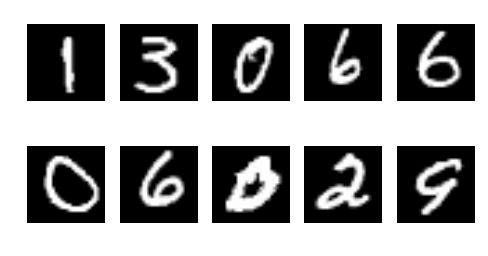

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 4))
plt.axis('off')

for i, idx in enumerate(np.random.choice(len(X_train), size=10)):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.imshow(X_train[idx], cmap=plt.cm.Greys_r)
    ax.axis('off')

plt.show()

#### Подготовка данных

In [4]:
# Reshaping data
img_rows, img_cols = 28, 28
nb_classes = 10

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [5]:
# One-hot-encoding
y_train_ohe = np_utils.to_categorical(y_train, nb_classes)
y_test_ohe = np_utils.to_categorical(y_test, nb_classes)

In [6]:
print X_train.shape, y_train_ohe.shape
print X_test.shape, y_test_ohe.shape

(60000, 1, 28, 28) (60000, 10)
(10000, 1, 28, 28) (10000, 10)


#### Подготовка модели, компиляция

In [7]:
img_rows, img_cols = 28, 28
nb_classes = 10

In [8]:
model = Sequential()
model.add(Convolution2D(32, 3, 3,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#### Обучение модели

In [10]:
history = model.fit(X_train, y_train_ohe, batch_size=128, nb_epoch=5, verbose=1,
                    validation_data=(X_test, y_test_ohe))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 90s - loss: 1.0772 - acc: 0.6536 - val_loss: 0.3226 - val_acc: 0.9087
Epoch 2/5
60000/60000 [==============================] - 90s - loss: 0.4784 - acc: 0.8514 - val_loss: 0.2435 - val_acc: 0.9279
Epoch 3/5
60000/60000 [==============================] - 85s - loss: 0.3949 - acc: 0.8766 - val_loss: 0.2104 - val_acc: 0.9372
Epoch 4/5
60000/60000 [==============================] - 85s - loss: 0.3565 - acc: 0.8906 - val_loss: 0.1841 - val_acc: 0.9449
Epoch 5/5
60000/60000 [==============================] - 89s - loss: 0.3231 - acc: 0.9012 - val_loss: 0.1741 - val_acc: 0.9484


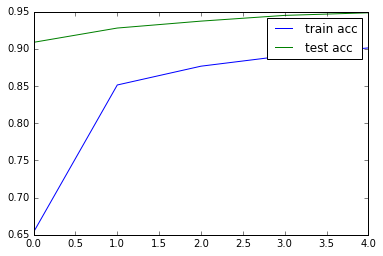

In [11]:
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='test acc')
plt.legend()

#### Тестирование

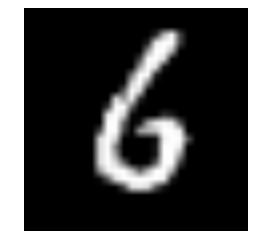

predicted probabilities:
0 	0.000465261
1 	2.74948e-06
2 	0.000121824
3 	5.56882e-05
4 	1.88485e-05
5 	0.00220743
6 	0.997099
7 	5.6976e-08
8 	2.52313e-05
9 	3.92001e-06
predicted label: 6
correct label:   6


In [12]:
img_idx = 50

plt.axis('off')
plt.imshow(X_test[img_idx, 0], cmap=plt.cm.Greys_r)
plt.show()

predicted_proba = model.predict(X_test[img_idx][np.newaxis, ...])
print 'predicted probabilities:'
for i in range(10):
    print i, '\t', predicted_proba[0][i]
print 'predicted label:', predicted_proba.argmax()
print 'correct label:  ', y_test[img_idx]

#### Model summary

Позволяет понять, сколько параметров в каждом слое.

In [13]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 26, 26)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 24, 24)    9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 32, 24, 24)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

#### Кросс-валидация

In [ ]:
from sklearn.cross_validation import KFold, StratifiedKFold

In [ ]:
for train_idx, test_idx in StratifiedKFold(y_train, n_folds=5, shuffle=True):
    print 'len(train_idx) = {};\t len(test_idx) = {}'.format(len(train_idx), len(test_idx))
    #
    # ... Train and evaluate your network here ...
    #

### Callbacks

Основная цель &mdash; делать что-то после каждой эпохи или батча.

#### ModelCheckpoint

In [ ]:
history = model.fit(X_train, y_train_ohe, batch_size=128, nb_epoch=5, verbose=1,
                    validation_data=(X_test, y_test_ohe),
                    
                    callbacks=[ModelCheckpoint('models weights/'
                                               'weights.ep-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5',
                                               monitor='val_acc', save_best_only=True, 
                                               save_weights_only=False)])

#### LearningRateScheduler

In [ ]:
def step_decay(epoch, initial_lrate=0.1):
    drop = 0.1
    epochs_drop = 3
    lrate = initial_lrate * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lrate

In [ ]:
history = model.fit(X_train, y_train_ohe, batch_size=128, nb_epoch=9, verbose=1,
                    validation_data=(X_test, y_test_ohe),
                    
                    callbacks=[LearningRateScheduler(step_decay)])

**Другие колбэки:**
* TensorBoard
* EarlyStopping

keras.callbacks.EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
* RemoteMonitor

keras.callbacks.RemoteMonitor(root='http://localhost:9000', path='/publish/epoch/end/', field='data')
* можно создавать свои (Callback)


**Coming soon (и уже есть в последней версии с github):**
* CSVLogger
* ReduceLROnPlateau

### Transfer learning

#### Копирование весов из одной сети в другую

In [14]:
img_rows, img_cols = 28, 28
n_classes = 10

In [15]:
model = Sequential()

# --------------------------------------------
# VGG-16 TAIL
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1', input_shape=(1, img_rows, img_cols), 
                        trainable=False))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2', 
                        trainable=False))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1', 
                        trainable=False))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2', 
                        trainable=False))
model.add(MaxPooling2D((2,2), strides=(2,2)))

#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1', 
#                        trainable=False))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2', 
#                        trainable=False))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3', 
#                        trainable=False))
#model.add(ZeroPadding2D((1,1)))
#model.add(MaxPooling2D((2, 2), strides=(2,2)))

#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1', 
#                        trainable=False))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2', 
#                        trainable=False))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3', 
#                        trainable=False))
#model.add(MaxPooling2D((2, 2), strides=(2,2)))
# --------------------------------------------

# TRAINABLE CONV LAYERS
model.add(Convolution2D(128, 3, 3, border_mode='same', name='conv5_1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Convolution2D(128, 3, 3, border_mode='same', name='conv5_2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Convolution2D(128, 3, 3, border_mode='same', name='conv5_3'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
# --------------------------------------------

# CLASSIFICATION HEAD
model.add(Flatten())
model.add(Dense(1024, name='dense6_1'))
model.add(Activation('relu'))

model.add(Dense(128, name='dense6_2'))
model.add(Activation('relu'))

model.add(Dense(n_classes, name='dense6_3'))
model.add(Activation('softmax'))

In [16]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
conv1_1 (Convolution2D)          (None, 64, 26, 26)    0           convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 64, 28, 28)    0           conv1_1[0][0]                    
____________________________________________________________________________________________________
conv1_2 (Convolution2D)          (None, 64, 26, 26)    0           zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 64, 13, 13)    0           conv1_2[0][0]                    
___________________________________________________________________________________________

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [18]:
import h5py
f = h5py.File("vgg weights/vgg16_weights.h5", "r")

for layer_name in ('conv1_1', 'conv1_2', 'conv2_1', 'conv2_2'):
    weights = np.array(f.get(layer_name).get(layer_name + '_W'))
    biases = np.array(f.get(layer_name).get(layer_name + '_b'))
    
    if layer_name == 'conv1_1':
        weights = weights[:, [0], :, :]    # discarding other components of RGB
    
    print('Copied layer {} of shape {}'.format(layer_name, weights.shape))
    layer = model.get_layer(layer_name)
    layer.set_weights([weights, biases])

Copied layer conv1_1 of shape (64, 1, 3, 3)
Copied layer conv1_2 of shape (64, 64, 3, 3)
Copied layer conv2_1 of shape (128, 64, 3, 3)
Copied layer conv2_2 of shape (128, 128, 3, 3)


In [19]:
history = model.fit(X_train, y_train_ohe, batch_size=64, nb_epoch=5, verbose=1,
                    validation_data=(X_test, y_test_ohe))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 336s - loss: 0.5437 - acc: 0.8175 - val_loss: 0.0698 - val_acc: 0.9775
Epoch 2/5
60000/60000 [==============================] - 385s - loss: 0.1353 - acc: 0.9604 - val_loss: 0.0418 - val_acc: 0.9880
Epoch 3/5
60000/60000 [==============================] - 392s - loss: 0.0971 - acc: 0.9719 - val_loss: 0.0396 - val_acc: 0.9878
Epoch 4/5
60000/60000 [==============================] - 419s - loss: 0.0809 - acc: 0.9767 - val_loss: 0.0279 - val_acc: 0.9912
Epoch 5/5
60000/60000 [==============================] - 432s - loss: 0.0693 - acc: 0.9803 - val_loss: 0.0299 - val_acc: 0.9920


#### Готовые сети

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.application.music_tagger_crnn import MusicTaggerCRNN    # capable of outputting the musical genre of the track

keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=None)

Ожидается в следующем релизе. Есть в последней версии на **github**: https://github.com/fchollet/keras/tree/master/keras/applications

### Functional API

При создании модели указываются только входы и выходы. Выход &mdash; сложная функция от входа.

In [20]:
img_rows, img_cols = 28, 28
nb_classes = 10

#### Описание модели

In [21]:
x = Input(shape=(1, img_rows, img_cols))
conv1 = Convolution2D(32, 3, 3, 
                      border_mode='valid')(x)
act1 = Activation('relu')(conv1)
conv2 = Convolution2D(32, 3, 3)(act1)
act2 = Activation('relu')(conv2)
pool2 = MaxPooling2D((2, 2))(act2)
drop2 = Dropout(0.25)(pool2)

flatten3 = Flatten()(drop2)
dense3 = Dense(128)(flatten3)
act3 = Activation('relu')(dense3)
drop3 = Dropout(0.5)(act3)
dense4 = Dense(nb_classes)(drop3)
y = Activation('softmax')(dense4)

In [22]:
model = Model(input=x, output=y)

#### Компиляция

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#### Обучение модели

In [24]:
history = model.fit(X_train, y_train_ohe, batch_size=128, nb_epoch=5, verbose=1,
                    validation_data=(X_test, y_test_ohe))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 95s - loss: 1.2333 - acc: 0.5965 - val_loss: 0.3567 - val_acc: 0.8965
Epoch 2/5
60000/60000 [==============================] - 108s - loss: 0.4986 - acc: 0.8453 - val_loss: 0.2535 - val_acc: 0.9267
Epoch 3/5
60000/60000 [==============================] - 112s - loss: 0.4018 - acc: 0.8761 - val_loss: 0.2166 - val_acc: 0.9356
Epoch 4/5
60000/60000 [==============================] - 102s - loss: 0.3554 - acc: 0.8919 - val_loss: 0.1963 - val_acc: 0.9425
Epoch 5/5
60000/60000 [==============================] - 108s - loss: 0.3253 - acc: 0.9018 - val_loss: 0.1709 - val_acc: 0.9499


### Преимущества Functional API

Можно задавать не только последовательную модель, но и модель в виде любого **ациклического графа**

<img src="pics/multi-input-multi-output-graph.png" width=40%>

In [25]:
# headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# this embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# a LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)

auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

auxiliary_input = Input(shape=(5,), name='aux_input')
x = merge([lstm_out, auxiliary_input], mode='concat')

# we stack a deep fully-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# and finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [26]:
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 1, 28, 28)     0                                            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 32, 26, 26)    320         input_1[0][0]                    
____________________________________________________________________________________________________
activation_11 (Activation)       (None, 32, 26, 26)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 32, 24, 24)    9248        activation_11[0][0]              
___________________________________________________________________________________________

#### Shared layers

Создается слой как функция. Эта функция применяется к разным входам и выходам.


<img src="pics/shared_layers.png" width=40%>

In [28]:
tweet_a = Input(shape=(140, 256))
tweet_b = Input(shape=(140, 256))

In [29]:
# this layer can take as input a matrix
# and will return a vector of size 64
shared_lstm = LSTM(64)

# when we reuse the same layer instance
# multiple times, the weights of the layer
# are also being reused
# (it is effectively *the same* layer)
encoded_a = shared_lstm(tweet_a)
encoded_b = shared_lstm(tweet_b)

# we can then concatenate the two vectors:
merged_vector = merge([encoded_a, encoded_b], mode='concat', concat_axis=-1)

# and add a logistic regression on top
predictions = Dense(1, activation='sigmoid')(merged_vector)

In [30]:
# we define a trainable model linking the
# tweet inputs to the predictions
model = Model(input=[tweet_a, tweet_b], output=predictions)

### Lambda layer

Добавляет любую функцию на Theano / Tensorflow как слой.

keras.layers.core.Lambda(function, output_shape=None, arguments={})

In [31]:
model = Sequential()
model.add(Dense(50, input_shape=(100,)))

In [32]:
# add a x -> x^2 layer
model.add(Lambda(lambda x: x ** 2))

In [33]:
import keras.backend as K

def antirectifier(x):
    x -= K.mean(x, axis=1, keepdims=True)
    x = K.l2_normalize(x, axis=1)
    pos = K.relu(x)
    neg = K.relu(-x)
    return K.concatenate([pos, neg], axis=1)

def antirectifier_output_shape(input_shape):
    shape = list(input_shape)
    assert len(shape) == 2  # only valid for 2D tensors
    shape[-1] *= 2
    return tuple(shape)

model.add(Lambda(antirectifier, output_shape=antirectifier_output_shape))

Можно описывать и более сложные слои, создавая классы-наследники *Layer*. https://keras.io/layers/writing-your-own-keras-layers/

### Генераторы данных

Для чего нужны генераторы данных:
* Считывать информацию по частям.
* Предобработать данные "на лету".
* Работать с большими датасетами (подгружать только порцию данных). При этом данные могут быть где угодно, например, в Интернете.
* Добиться ускорения за счет асинхронной подгрузки данных на CPU во время обучения на GPU.

#### Датасет CIFAR-10
Цветные картинки 32x32, классификация на 10 классов. 

50000 картинок для обучения, 10000 для тестирования.

In [34]:
from keras.datasets import cifar10

In [35]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 3, 32, 32), (50000, 1), (10000, 3, 32, 32), (10000, 1))

In [37]:
nb_classes = 10

# One-hot-encoding
y_train_ohe = np_utils.to_categorical(y_train, nb_classes)
y_test_ohe = np_utils.to_categorical(y_test, nb_classes)

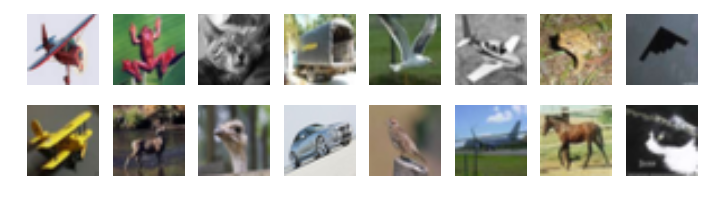

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 3))
plt.axis('off')

for i, idx in enumerate(np.random.choice(len(X_train), size=16)):
    ax = fig.add_subplot(2, 8, i + 1)
    cur_img = X_train[idx]
    cur_img = np.rollaxis(cur_img, 0, 3)
    ax.imshow(cur_img)
    ax.axis('off')

plt.show()

#### Генератор

In [39]:
def data_generator(X, y, batch_size=64):
    """Gets random batch of data, 
    divides by 255, 
    and crops a little portion in the upper-left."""
    
    while True:
        idx = np.random.choice(len(X), size=batch_size)
        batch_X = X[idx].copy()
        batch_y = y[idx].copy()
        
        batch_X = batch_X / 255.0
        batch_X = batch_X[..., :batch_X.shape[2] / 2, :batch_X.shape[3] / 2]
        yield batch_X, batch_y

In [40]:
gen = data_generator(X_train, y_train, batch_size=16)
batch_X, batch_y = gen.next()

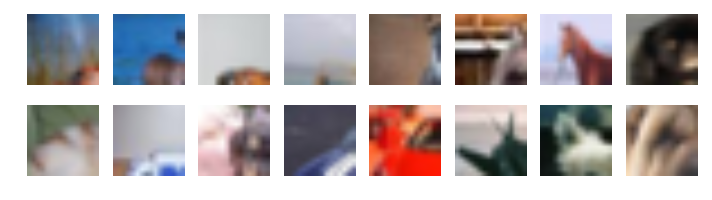

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 3))
plt.axis('off')

for i, img in enumerate(batch_X):
    ax = fig.add_subplot(2, 8, i + 1)
    cur_img = img.copy()
    cur_img = np.rollaxis(cur_img, 0, 3)
    ax.imshow(cur_img)
    ax.axis('off')

plt.show()

#### Подготовка модели и компиляция

In [42]:
img_rows, img_cols = 16, 16
nb_classes = 10

In [43]:
model = Sequential()
model.add(Convolution2D(32, 3, 3,
                        border_mode='valid',
                        input_shape=(3, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [45]:
history = model.fit_generator(data_generator(X_train, y_train_ohe, batch_size=1024), 
                              samples_per_epoch=32768, 
                              
                              validation_data=data_generator(X_test, y_test_ohe), 
                              nb_val_samples=1024,
                              
                              nb_epoch=5, verbose=1)

Epoch 1/5
32768/32768 [==============================] - 17s - loss: 2.3251 - acc: 0.1012 - val_loss: 2.3007 - val_acc: 0.0889
Epoch 2/5
32768/32768 [==============================] - 16s - loss: 2.3031 - acc: 0.1087 - val_loss: 2.2948 - val_acc: 0.1289
Epoch 3/5
32768/32768 [==============================] - 16s - loss: 2.2983 - acc: 0.1123 - val_loss: 2.2919 - val_acc: 0.1240
Epoch 4/5
32768/32768 [==============================] - 16s - loss: 2.2927 - acc: 0.1197 - val_loss: 2.2831 - val_acc: 0.1299
Epoch 5/5
32768/32768 [==============================] - 16s - loss: 2.2892 - acc: 0.1269 - val_loss: 2.2802 - val_acc: 0.1367


### ImageDataGenerator

Готовый генератор для Data Augmentation, если данные &mdash; изображения.

In [46]:
idg = ImageDataGenerator(rescale=1./255,  
                         width_shift_range=0.1, height_shift_range=0.1, 
                         rotation_range=100, horizontal_flip=True, vertical_flip=True,
                         zoom_range=(1.0, 1.2), cval=1.0)
                         #samplewise_center=True, samplewise_std_normalization=True)    # these two require
                                                                                        # to look over full data set!

In [47]:
gen = idg.flow(X_train, y_train, batch_size=32)
batch_X, batch_y = gen.next()

In [48]:
batch_X.shape

(32, 3, 32, 32)

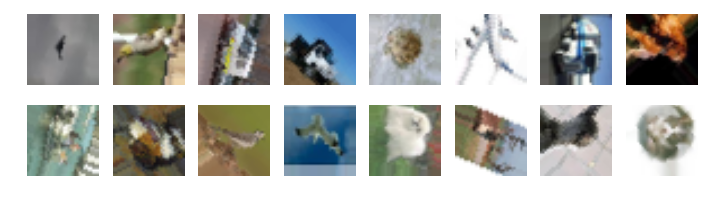

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 3))
plt.axis('off')

for i, img in enumerate(batch_X[:16]):
    ax = fig.add_subplot(2, 8, i + 1)
    cur_img = img.copy()
    cur_img = np.rollaxis(cur_img, 0, 3)
    ax.imshow(cur_img)
    ax.axis('off')

plt.show()

В Keras есть и другие готовые генераторы, например:
* **skipgrams**: Transforms a sequence of word indexes (list of int) into couples of the form: (word, word in the same window), with label 1 (positive samples); (word, random word from the vocabulary), with label 0 (negative samples).
* **one_hot**: One-hot encode a text into a list of word indexes in a vocabulary of size n.
* **Tokenizer**: Class for vectorizing texts, or/and turning texts into sequences (=list of word indexes, where the word of rank i in the dataset (starting at 1) has index i).

### HDF5

* Позволяет сохранить сколь угодно большой массив данных как файл.
* Поддерживает быстрый доступ к данным.
* Чтобы записать данные, можно ни разу не загружать их в оперативную память.

h5py: http://docs.h5py.org/ 

In [50]:
import h5py

In [51]:
h5_file = h5py.File("hdf5 data/cifar_10.h5", "w-")

In [52]:
h5_file.create_group("train")
h5_file.create_group("test")

<HDF5 group "/test" (0 members)>

In [53]:
X_train_ds = h5_file.create_dataset("train/images", X_train.shape, dtype='u1', 
                                    chunks=(5, 3, 32, 32))
X_train_ds[:] = X_train

y_train_ds = h5_file.create_dataset("train/labels", y_train_ohe.shape, dtype='u1')
y_train_ds[:] = y_train_ohe

In [54]:
X_test_ds = h5_file.create_dataset("test/images", X_test.shape, dtype='u1', 
                                    chunks=(5, 3, 32, 32))
X_test_ds[:] = X_test

y_test_ds = h5_file.create_dataset("test/labels", y_test_ohe.shape, dtype='u1')
y_test_ds[:] = y_test_ohe

In [55]:
h5_file['name'] = 'CIFAR-10 dataset'
h5_file['website'] = 'https://www.cs.toronto.edu/~kriz/cifar.html'

In [56]:
h5_file.items()

[(u'name', <HDF5 dataset "name": shape (), type "|O">),
 (u'test', <HDF5 group "/test" (2 members)>),
 (u'train', <HDF5 group "/train" (2 members)>),
 (u'website', <HDF5 dataset "website": shape (), type "|O">)]

In [57]:
h5_file['train'].items()

[(u'images', <HDF5 dataset "images": shape (50000, 3, 32, 32), type "|u1">),
 (u'labels', <HDF5 dataset "labels": shape (50000, 10), type "|u1">)]

In [ ]:
h5_file.close()    # important

#### Обучение модели с HDF5 массивом

In [58]:
img_rows, img_cols = 32, 32
nb_classes = 10

In [59]:
model = Sequential()
model.add(Convolution2D(32, 3, 3,
                        border_mode='valid',
                        input_shape=(3, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [61]:
history = model.fit(X_train_ds, y_train_ds, batch_size=256, nb_epoch=10, verbose=1,
                    validation_data=(X_test_ds, y_test_ds),
                    shuffle=False)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 110s - loss: 14.5028 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 117s - loss: 14.5028 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 98s - loss: 14.5060 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 95s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 95s - loss: 14.5064 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 100s - loss: 14.5064 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 102s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/10
50000/50000 [============

#### Можно и с генератором

In [65]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [66]:
def data_generator(X, y, batch_size=64):
    """Gets random batch of data, 
    divides by 255."""
    
    while True:
        idx = np.random.choice(len(X), size=batch_size)
        batch_X = [X[i] for i in idx]
        batch_X = np.array(batch_X)
        batch_y = [y[i] for i in idx]
        batch_y = np.array(batch_y)
        
        batch_X = batch_X / 255.0
        yield batch_X, batch_y

In [67]:
history = model.fit_generator(data_generator(X_train_ds, y_train_ds, batch_size=256), 
                              samples_per_epoch=32768, 
                              
                              validation_data=data_generator(X_test_ds, y_test_ds), 
                              nb_val_samples=1024,
                              
                              nb_epoch=10, verbose=1)

Epoch 1/10
32768/32768 [==============================] - 69s - loss: 2.1215 - acc: 0.2088 - val_loss: 2.0474 - val_acc: 0.2725
Epoch 2/10
32768/32768 [==============================] - 67s - loss: 2.0781 - acc: 0.2302 - val_loss: 2.0177 - val_acc: 0.2705
Epoch 3/10
32768/32768 [==============================] - 67s - loss: 2.0423 - acc: 0.2475 - val_loss: 1.9251 - val_acc: 0.3145
Epoch 4/10
32768/32768 [==============================] - 72s - loss: 2.0069 - acc: 0.2693 - val_loss: 1.9443 - val_acc: 0.2988
Epoch 5/10
32768/32768 [==============================] - 72s - loss: 1.9657 - acc: 0.2844 - val_loss: 1.8956 - val_acc: 0.3428
Epoch 6/10
32768/32768 [==============================] - 79s - loss: 1.9313 - acc: 0.3080 - val_loss: 1.8533 - val_acc: 0.3447
Epoch 7/10
32768/32768 [==============================] - 64s - loss: 1.8990 - acc: 0.3183 - val_loss: 1.7570 - val_acc: 0.3770
Epoch 8/10
32768/32768 [==============================] - 65s - loss: 1.8724 - acc: 0.3280 - val_loss: 1

Исходный код Keras:
https://github.com/fchollet/keras/blob/master/keras

По исходному коду можно разобраться в логике работы функции, разъяснить непонятные моменты.

<img src="pics/keras_code_example.png">

#### Keras resources

https://github.com/fchollet/keras-resources

